In [1]:
import os
import pickle
import numpy as np
import cv2

#path_train = "C:\\Users\\me\\Jupiter_Notebooks\\Dataset\\Train"
#path_test = "C:\\Users\\me\\Jupiter_Notebooks\\Dataset\\Test"

In [71]:
#Import libraries and packages

import tensorflow as tf
from transformers import ViTFeatureExtractor, TFViTModel

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, GlobalMaxPool2D, GlobalAveragePooling1D 
from tensorflow.keras.optimizers import Adam, SGD

from keras.models import Sequential
from keras.layers.core import Dense, Activation

from tensorflow.keras.layers import Input
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.layers import Input
from keras.models import Model

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
os.getcwd()

'C:\\Users\\maria\\Jupiter_Notebooks\\Dataset_Thermal\\SeekThermal'

In [3]:
path_train = "../SeekThermal/Train"
path_test = "../SeekThermal/Test"

In [4]:
# defining the class for the train dataset

class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 300):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def process_image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data,dtype=object)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.process_image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('..\SeekThermal\X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('..\SeekThermal\Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('..\SeekThermal\X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('..\SeekThermal\Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from Pickle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data

In [5]:
a = MasterImage(PATH = path_train,IMAGE_SIZE = 224)

In [6]:
array_a = a.load_dataset()
array_a

Reading Dataset from Pickle Object


(array([[[[0.97254902, 0.99607843, 1.        ],
          [0.98823529, 0.99607843, 1.        ],
          [0.99215686, 0.99607843, 0.99607843],
          ...,
          [0.70588235, 0.16862745, 0.        ],
          [0.73333333, 0.18823529, 0.00392157],
          [0.75686275, 0.21176471, 0.01568627]],
 
         [[1.        , 0.98823529, 0.99215686],
          [1.        , 0.98039216, 1.        ],
          [0.99607843, 0.98823529, 0.99607843],
          ...,
          [0.68627451, 0.17254902, 0.        ],
          [0.70980392, 0.18823529, 0.        ],
          [0.73333333, 0.2       , 0.        ]],
 
         [[0.99607843, 0.98431373, 0.99215686],
          [0.97647059, 0.98039216, 1.        ],
          [0.96078431, 0.98039216, 1.        ],
          ...,
          [0.70980392, 0.16862745, 0.        ],
          [0.73333333, 0.18823529, 0.00392157],
          [0.75686275, 0.20784314, 0.00784314]],
 
         ...,
 
         [[0.00392157, 0.        , 0.00784314],
          [0.01176

In [7]:
(train_images, train_labels) = array_a

In [8]:
print(train_images.shape, train_labels.shape)

(4732, 224, 224, 3) (4732,)


In [9]:
# defining the class for the test dataset

class MasterImage1(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def process_image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.process_image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('..\SeekThermal\X1_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('..\SeekThermal\Y1_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('..\SeekThermal\X1_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('..\SeekThermal\Y1_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from Pickle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data

In [10]:
b = MasterImage1(PATH = path_test, IMAGE_SIZE = 224)

In [11]:
array_b = b.load_dataset()
array_b

Reading Dataset from Pickle Object


(array([[[[0.97254902, 0.99607843, 1.        ],
          [0.98823529, 0.99607843, 1.        ],
          [0.99215686, 0.99607843, 0.99607843],
          ...,
          [0.70588235, 0.16862745, 0.        ],
          [0.73333333, 0.18823529, 0.00392157],
          [0.75686275, 0.21176471, 0.01568627]],
 
         [[1.        , 0.98823529, 0.99215686],
          [1.        , 0.98039216, 1.        ],
          [0.99607843, 0.98823529, 0.99607843],
          ...,
          [0.68627451, 0.17254902, 0.        ],
          [0.70980392, 0.18823529, 0.        ],
          [0.73333333, 0.2       , 0.        ]],
 
         [[0.99607843, 0.98431373, 0.99215686],
          [0.97647059, 0.98039216, 1.        ],
          [0.96078431, 0.98039216, 1.        ],
          ...,
          [0.70980392, 0.16862745, 0.        ],
          [0.73333333, 0.18823529, 0.00392157],
          [0.75686275, 0.20784314, 0.00784314]],
 
         ...,
 
         [[0.00392157, 0.        , 0.00784314],
          [0.01176

In [12]:
(test_images, test_labels) = array_b

In [13]:
print(train_images.shape, train_labels.shape)

(4732, 224, 224, 3) (4732,)


### Defining the Man images category as '1' vs  Car and Cat as '0'

In [14]:
### Defining Man as 1 vs the other categories
test_labels_binary0 = np.where(test_labels==1, 0, test_labels) 
test_labels_binary0

array([0, 0, 0, ..., 2, 2, 2])

In [15]:
test_labels_binary = np.where(test_labels==2, 1, test_labels_binary0)
np.unique(test_labels_binary)

array([0, 1])

In [16]:
### Man
train_labels_binary0 = np.where(train_labels==1, 0, train_labels) 
train_labels_binary0

array([0, 0, 0, ..., 2, 2, 2])

In [17]:
train_labels_binary = np.where(train_labels==2, 1, train_labels_binary0)
train_labels_binary 

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
train_images.shape[1:]

(224, 224, 3)

In [ ]:
## Reshaping the arrays

In [19]:
test_labels_binary = test_labels_binary.reshape(test_labels_binary.shape[0],1)
train_labels_binary = train_labels_binary.reshape(train_labels_binary.shape[0],1)

In [20]:
print('Train: X_images=%s, y_labels=%s' % (train_images.shape, train_labels_binary.shape))
print('Test: X_images=%s, y_labels=%s' % (test_images.shape, test_labels_binary.shape))

Train: X_images=(4732, 224, 224, 3), y_labels=(4732, 1)
Test: X_images=(1067, 224, 224, 3), y_labels=(1067, 1)


In [21]:
# Setting 17% of the training set as a validation set

#validation set
X_val_images = train_images[-800:]
y_val_labels = train_labels_binary[-800:]

#training set
X_train_images = train_images[:-800]
y_train_labels = train_labels_binary[:-800]

In [22]:
X_val_images.shape

(800, 224, 224, 3)

In [23]:
print('Train: X_train_images=%s, y_train_labels=%s' % (X_train_images.shape, y_train_labels.shape))
print('Validation: X_val_images=%s, y_val_labels=%s' % (X_val_images.shape, y_val_labels.shape))

Train: X_train_images=(3932, 224, 224, 3), y_train_labels=(3932, 1)
Validation: X_val_images=(800, 224, 224, 3), y_val_labels=(800, 1)


### Using Vision Transformer (ViT) pre-trained on ImageNet-21k

In [29]:
# Flipping and rotating images
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

In [26]:
base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at google/vit-base-patch16-224-in21k.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


### The model

In [106]:
# Freeze base model
base_model.trainable = False
# Create new model
inputs = keras.Input(shape = (3, 224, 224))
x = data_augmentation(inputs)   # apply data augmentation

vit = base_model.vit(x)[0]
vit = keras.layers.GlobalAveragePooling1D()(vit)
vit = tf.keras.layers.Dense(256, activation='relu')(vit)
vit = tf. keras.layers.Dropout(0.15)(vit)
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(vit)

In [107]:
model_vit = tf.keras.Model(inputs, outputs)
print(model_vit.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 3, 224, 224)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 3, 224, 224)       0         
_________________________________________________________________
vit (TFViTMainLayer)         TFBaseModelOutputWithPool 86389248  
_________________________________________________________________
global_average_pooling1d_8 ( (None, 768)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               196864    
_________________________________________________________________
dropout_41 (Dropout)         (None, 256)               0         
_________________________________________________________________
outputs (Dense)              (None, 1)                 257 

In [108]:
model_vit.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [109]:
# Reshaping for the model
X_train_images = np.reshape(X_train_images, (3932, 3, 224, 224))
X_val_images = np.reshape(X_val_images, (800, 3, 224, 224))
X_test_images = np.reshape(test_images, (1067, 3, 224, 224))

In [83]:
# Train the Vit model
#vit_trained_model = model.fit( X_train_images1, y_train_labels, validation_data=(X_val_images1, y_val_labels), batch_size = 16, verbose=2, epochs=50)

#scores = model.evaluate(test_images, test_labels_binary, verbose=0)
#print("ViT Model Accuracy on Test Set: %.2f%%" % (scores[1]*100))

#### Using generators to train the model  - the fit. method runs out of memory with this dataset.

In [110]:
from tensorflow.keras.utils import Sequence
 

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train_images, y_train_labels, 16)
test_gen = DataGenerator(X_val_images, y_val_labels, 16)


trained_model_vit = model_vit.fit(train_gen, epochs=100,validation_data=test_gen)


Epoch 1/100
246/246 [==============================] - 51s 172ms/step - loss: 0.5279 - accuracy: 0.7541 - val_loss: 2.6179 - val_accuracy: 0.0000e+00
Epoch 2/100
246/246 [==============================] - 40s 165ms/step - loss: 0.4621 - accuracy: 0.7915 - val_loss: 2.2746 - val_accuracy: 0.0000e+00
Epoch 3/100
246/246 [==============================] - 41s 165ms/step - loss: 0.4253 - accuracy: 0.8029 - val_loss: 1.3570 - val_accuracy: 0.2050
Epoch 4/100
246/246 [==============================] - 41s 166ms/step - loss: 0.4332 - accuracy: 0.8014 - val_loss: 1.5609 - val_accuracy: 0.0975
Epoch 5/100
246/246 [==============================] - 41s 165ms/step - loss: 0.3969 - accuracy: 0.8202 - val_loss: 2.2107 - val_accuracy: 0.0050
Epoch 6/100
246/246 [==============================] - 41s 166ms/step - loss: 0.3927 - accuracy: 0.8266 - val_loss: 0.7389 - val_accuracy: 0.5425
Epoch 7/100
246/246 [==============================] - 41s 167ms/step - loss: 0.3958 - accuracy: 0.8235 - val_loss: 

Epoch 57/100
246/246 [==============================] - 41s 167ms/step - loss: 0.2699 - accuracy: 0.8825 - val_loss: 1.2828 - val_accuracy: 0.6100
Epoch 58/100
246/246 [==============================] - 41s 166ms/step - loss: 0.2578 - accuracy: 0.8917 - val_loss: 0.8719 - val_accuracy: 0.6837
Epoch 59/100
246/246 [==============================] - 41s 167ms/step - loss: 0.2634 - accuracy: 0.8815 - val_loss: 0.6284 - val_accuracy: 0.7812
Epoch 60/100
246/246 [==============================] - 41s 167ms/step - loss: 0.2562 - accuracy: 0.8932 - val_loss: 0.6433 - val_accuracy: 0.7513
Epoch 61/100
246/246 [==============================] - 41s 167ms/step - loss: 0.2569 - accuracy: 0.8894 - val_loss: 0.7523 - val_accuracy: 0.7312
Epoch 62/100
246/246 [==============================] - 41s 167ms/step - loss: 0.2583 - accuracy: 0.8848 - val_loss: 0.7079 - val_accuracy: 0.7250
Epoch 63/100
246/246 [==============================] - 41s 167ms/step - loss: 0.2596 - accuracy: 0.8868 - val_loss: 0

In [111]:
scores = model_vit.evaluate(X_test_images, test_labels_binary, verbose=0)
print("ViT Model Accuracy on Test Set: %.2f%%" % (scores[1]*100))

ViT Model Accuracy on Test Set: 90.82%


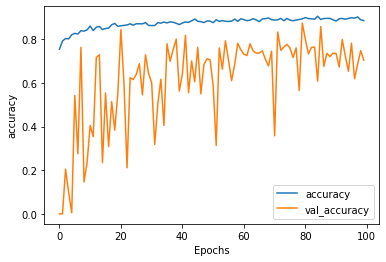

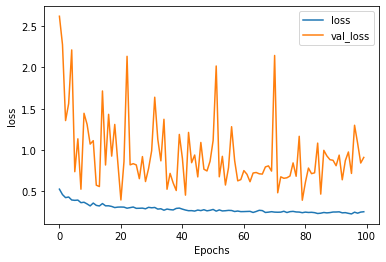

In [112]:
def plot_graphs(history, string):
    plt.plot(trained_model_vit.history[string])
    plt.plot(trained_model_vit.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
    
  #Plot the accuracy and loss
plot_graphs(trained_model_vit, "accuracy")
plot_graphs(trained_model_vit, "loss")

In [ ]:
#165ms/step - loss: 0.3569 - accuracy: 0.8424 - val_loss: 0.9583 -

In [ ]:
###  Model with more layers

In [99]:
# Freeze base model
base_model.trainable = False
# Create new model
inputs = keras.Input(shape = (3, 224, 224))
x = data_augmentation(inputs)   # apply data augmentation

vit = base_model.vit(x)[0]
vit = keras.layers.GlobalAveragePooling1D()(vit)
vit = tf.keras.layers.Dense(256, activation='relu')(vit)
vit = tf. keras.layers.Dropout(0.15)(vit)
vit = tf.keras.layers.Dense(128, activation='relu')(vit)
vit = tf. keras.layers.Dropout(0.15)(vit)
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(vit)

In [100]:
model_vit = tf.keras.Model(inputs, outputs)
print(model_vit.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 3, 224, 224)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 3, 224, 224)       0         
_________________________________________________________________
vit (TFViTMainLayer)         TFBaseModelOutputWithPool 86389248  
_________________________________________________________________
global_average_pooling1d_7 ( (None, 768)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               196864    
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               3289

In [102]:
model_vit.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [103]:
from tensorflow.keras.utils import Sequence
 

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train_images, y_train_labels, 16)
test_gen = DataGenerator(X_val_images, y_val_labels, 16)


trained_model_vit = model_vit.fit(train_gen, epochs=100,validation_data=test_gen)

Epoch 1/100
246/246 [==============================] - 53s 173ms/step - loss: 0.5201 - accuracy: 0.7599 - val_loss: 1.9560 - val_accuracy: 0.0000e+00
Epoch 2/100
246/246 [==============================] - 41s 165ms/step - loss: 0.4580 - accuracy: 0.7881 - val_loss: 2.1730 - val_accuracy: 0.0012
Epoch 3/100
246/246 [==============================] - 41s 166ms/step - loss: 0.4291 - accuracy: 0.8110 - val_loss: 1.3463 - val_accuracy: 0.1388
Epoch 4/100
246/246 [==============================] - 41s 166ms/step - loss: 0.4092 - accuracy: 0.8243 - val_loss: 1.2595 - val_accuracy: 0.2438
Epoch 5/100
246/246 [==============================] - 41s 166ms/step - loss: 0.3956 - accuracy: 0.8212 - val_loss: 0.6114 - val_accuracy: 0.6513
Epoch 6/100
246/246 [==============================] - 41s 166ms/step - loss: 0.3634 - accuracy: 0.8413 - val_loss: 1.6937 - val_accuracy: 0.0512
Epoch 7/100
246/246 [==============================] - 41s 167ms/step - loss: 0.3737 - accuracy: 0.8337 - val_loss: 1.14

Epoch 57/100
246/246 [==============================] - 41s 166ms/step - loss: 0.2630 - accuracy: 0.8886 - val_loss: 1.3816 - val_accuracy: 0.4375
Epoch 58/100
246/246 [==============================] - 41s 166ms/step - loss: 0.2584 - accuracy: 0.8850 - val_loss: 1.0218 - val_accuracy: 0.5775
Epoch 59/100
246/246 [==============================] - 41s 166ms/step - loss: 0.2752 - accuracy: 0.8815 - val_loss: 0.7353 - val_accuracy: 0.6938
Epoch 60/100
246/246 [==============================] - 41s 166ms/step - loss: 0.2594 - accuracy: 0.8891 - val_loss: 0.9030 - val_accuracy: 0.6313
Epoch 61/100
246/246 [==============================] - 41s 166ms/step - loss: 0.2670 - accuracy: 0.8891 - val_loss: 1.6550 - val_accuracy: 0.4462
Epoch 62/100
246/246 [==============================] - 41s 167ms/step - loss: 0.2664 - accuracy: 0.8848 - val_loss: 0.8980 - val_accuracy: 0.6037
Epoch 63/100
246/246 [==============================] - 41s 167ms/step - loss: 0.2647 - accuracy: 0.8876 - val_loss: 0

In [104]:
scores = model_vit.evaluate(X_test_images, test_labels_binary, verbose=0)
print("ViT Model Accuracy on Test Set: %.2f%%" % (scores[1]*100))

ViT Model Accuracy on Test Set: 87.54%


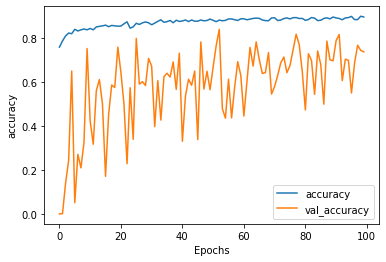

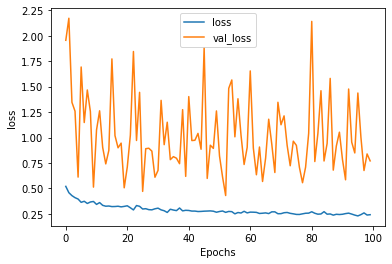

In [105]:
def plot_graphs(history, string):
    plt.plot(trained_model_vit.history[string])
    plt.plot(trained_model_vit.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
    
  #Plot the accuracy and loss
plot_graphs(trained_model_vit, "accuracy")
plot_graphs(trained_model_vit, "loss")

### Saving the model

In [ ]:
# Save the best model with early stopping and checkpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('../SeekThermal/vit_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model_vit.fit(X_train_images, y_train_labels,  validation_data=(X_val_images, y_val_labels), epochs=100, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('../SeekThermal/vit_best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train_images, y_train_labels, verbose=0)
_, test_acc = saved_model.evaluate(test_images, test_labels_binary, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))